### Node:
- A basic data structure which contains data and link to next node
- Olphan node: node without links pointing to themselves except for the head node
- Null node link: a node link with a NULL value (the path or data structure contains no further nodes)


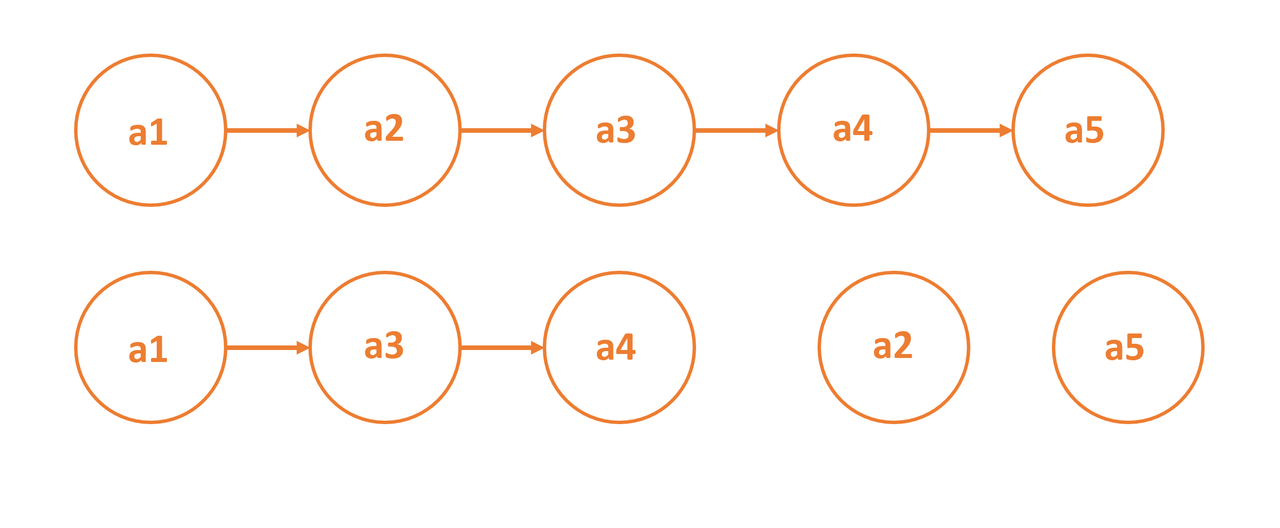

In [1]:
class Node:
  def __init__(self, value, link_node=None):
    self.value = value
    self.link_node = link_node
    
  def set_link_node(self, link_node):
    self.link_node = link_node
    
  def get_link_node(self):
    return self.link_node
  
  def get_value(self):
    return self.value


# assign variables:
a = Node("I am a - links to b")
b = Node("I am b - has a penchant for hoarding snacks")
c = Node("I am c - enjoys spending time in movie lots")

c.set_link_node(b)
a.set_link_node(c)

c_data = a.get_link_node().get_value()
b_data = c.get_link_node().get_value()

print(c_data, b_data)

I am c - enjoys spending time in movie lots I am b - has a penchant for hoarding snacks


### Linked List
- a linear data structure that consists of a list of nodes

- removing a node a2 requires a1 to point to a3 first (a1 > a2 > a3 ===> a1 > a3)

    code: current_node.next_node = next_node.next_node



- adding a new head node in a linked list requires maintaining the list by giving the new head node a link to the current head node
    
    i.e., a1 > a2 > a3 ---- adding a0 as head node ->   a0 > a1 > a2 > a3 (a0 must point to a1)
    
    code: new_head_node.next_node = self.head_node


- a linear data structure where elements are linked using pointers
    - in a linked list data is stored in nodes and each node is linked to the next and, optionally, to the previous
    - each node has:
        1) data
        2) a pointer (or reference) to the next node
        3) (option) a pointer to the previous node
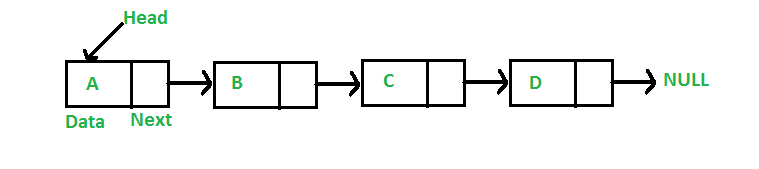



- the head node == NULL when values of linked list is empty.
    - head & tail pointers:
    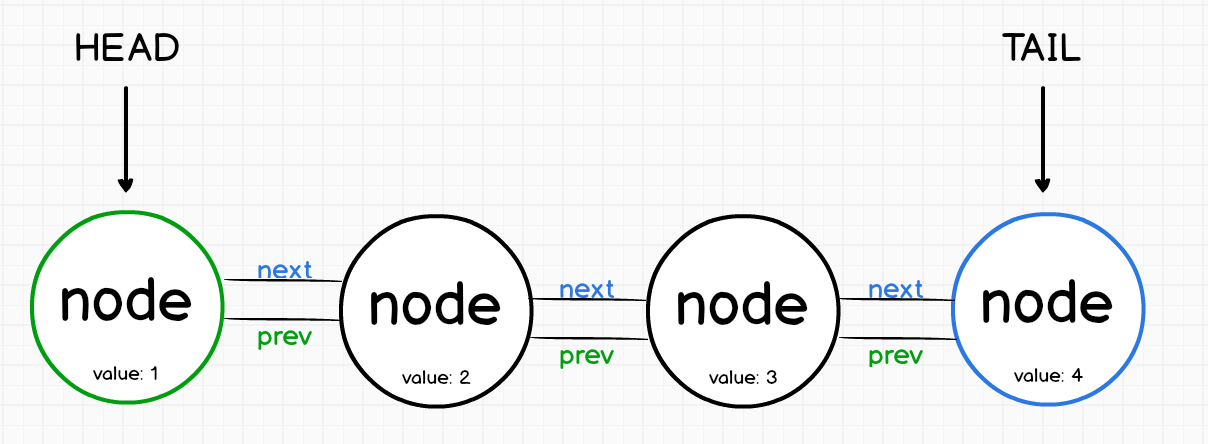


- a linked list only keeps track of the first node in the list. To traverse the list, it needs a method that loops through each node to find the following node


![Screenshot 2024-10-26 at 9.50.56 PM.png](<attachment:Screenshot 2024-10-26 at 9.50.56 PM.png>)
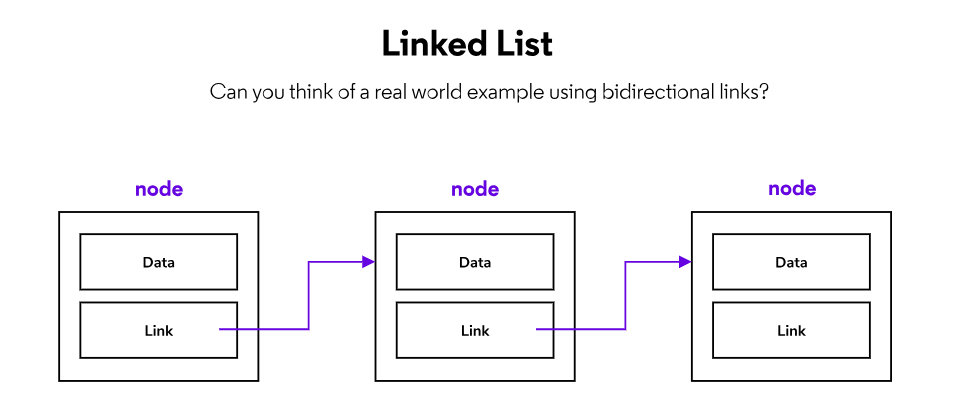

In [2]:
class Node:
  def __init__(self, value, next_node=None):
    self.value = value
    self.next_node = next_node

  def get_value(self):
    return self.value
  
  def get_next_node(self):
    return self.next_node

  def set_next_node(self, next_node):
    self.next_node = next_node


my_node = Node(value=44)
my_node.get_value()



class LinkedList:
  def __init__(self, value=None):
    self.head_node = Node(value)
  
  def get_head_node(self):
    return self.head_node
  

  def insert_beginning(self, new_value):
    new_node = Node(new_value)
    new_node.set_next_node(self.head_node)
    self.head_node = new_node

  
  def stringify_list(self):
    """
    Traverse the list, beginning at the head node, and collect each node value in a string. 
    Once the end of the list has been reached, the method should return the string.
    """
    string_list = ""
    current_node = self.get_head_node()
    while current_node:
      if current_node.get_value() != None:
        string_list += str(current_node.get_value()) + "\n"

      current_node = current_node.get_next_node()
    return string_list
  
  def remove_node(self, value_to_remove):
    """
    The remove_node method in the LinkedList class is designed to remove a node with a specific value. If this value is at the head, it updates the head to the next node. Otherwise, it traverses the list, and once found, it skips over the node to be removed, linking the previous node to the following one.
    """
    current_node = self.get_head_node()

    if current_node.get_value() == value_to_remove:
      self.head_node = current_node.get_next_node()
    
    else:
      while current_node:
        next_node = current_node.get_next_node()
        if next_node.get_value() == value_to_remove:
          current_node.set_next_node(next_node.get_next_node())
          current_node = None
        else:
          current_node = next_node


ll = LinkedList(5)
ll.insert_beginning(70)
ll.insert_beginning(5675)
ll.insert_beginning(90)
print(ll.stringify_list())

90
5675
70
5



In [3]:
a = Node(5, None)
b = Node(70, a)
c = Node(100, b)
d = Node(90, c)
ll = LinkedList(d)
# ll.stringfly_list() => 90, 100, 70, 5

#### Two Main Techniques
1) Use two pointers that move at the same speed.
    - Useful for problems like finding the nth-to-last element.
    - One pointer moves n steps ahead, and then both move together until the first pointer reaches the end.
    - The second pointer will then be at the nth-to-last element.

2) Pointers Moving at Different Speeds:
    - Use two pointers that move at different speeds, often with one moving twice as fast as the other.
    - Useful for problems like finding the middle node of a linked list.
    - The faster pointer moves two steps for every one step of the slower pointer.
    - When the faster pointer reaches the end, the slower pointer will be at the middle node.

Key Advantages of Two-Pointer Techniques:
- Efficient: These techniques often allow for linear time complexity (O(n)).
- Space-Efficient: They usually require constant extra space (O(1)).
- Versatile: They can be applied to various linked list problems.

In [4]:
import sys
sys.path.insert(0,"..")

from python_classes.linked_list import LinkedList

#1) same speed

def nth_last_node(linked_list, n):
  pass

def generate_test_linked_list():
  linked_list = LinkedList()
  for i in range(50, 0, -1):
    linked_list.insert_beginning(i)
  return linked_list


def nth_last_node(linked_list, n):
  current = None
  tail_seeker = linked_list.head_node
  count = 1
  while tail_seeker:
    tail_seeker = tail_seeker.get_next_node()
    count += 1
    if count >= n + 1:
      if current is None:
        current = linked_list.head_node
      else:
        current = current.get_next_node()
  return current

# Use this to test your code:
test_list = generate_test_linked_list()
print(test_list.stringify_list())
nth_last = nth_last_node(test_list, 4)
print(nth_last.value)




## 2) diff. speed

def find_middle(linked_list):
  fast = linked_list.head_node
  slow = linked_list.head_node
  while fast:
    fast = fast.get_next_node()
    if fast:
      fast = fast.get_next_node()
      slow = slow.get_next_node()
  return slow

def generate_test_linked_list(length):
  linked_list = LinkedList()
  for i in range(length, 0, -1):
    linked_list.insert_beginning(i)
  return linked_list

# Use this to test your code:
test_list = generate_test_linked_list(7)
print(test_list.stringify_list())
middle_node = find_middle(test_list)
print(middle_node.value)

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50

48
1
2
3
4
5
6
7

5


### Doubly linked list = Linked List + tail node

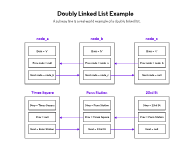

- similar to singly linked lists, but have an additional pointer to the previous node, making them bidirectional.
- DoublyLinkedList constructors has an added tail_node property while linked list dont.
- This allows for easier traversal in both directions and more efficient operations like removing nodes from python_classes.the middle of the list.


Adding to a doubly linked list involves updating the pointers of the new node and potentially the head or tail of the list. 

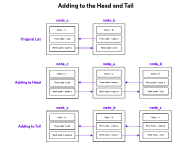



Removing a node requires updating the pointers of its neighboring nodes.

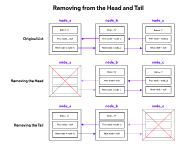

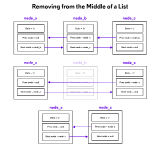



#### Key points to remember:
- Bidirectional traversal
- Easier middle node removal
- Pointer updates for additions and removals
- Head and tail pointers


![Screenshot 2024-10-26 at 9.51.23 PM.png](<attachment:Screenshot 2024-10-26 at 9.51.23 PM.png>)
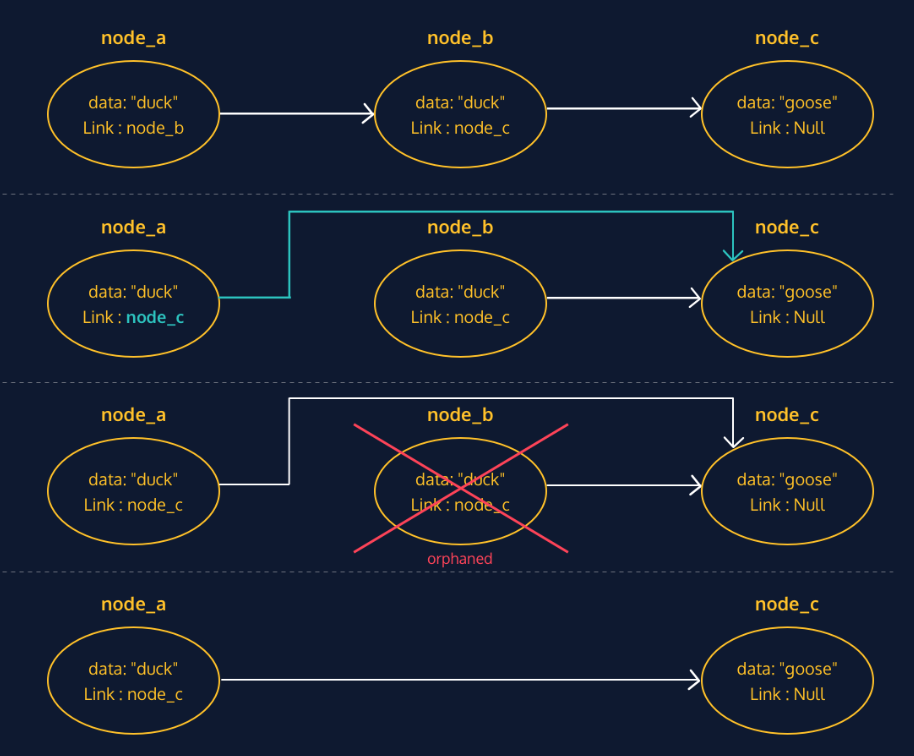

In [5]:
class Node:
  def __init__(self, value, next_node=None, prev_node=None):
    self.value = value
    self.next_node = next_node
    self.prev_node = prev_node
    
  def set_next_node(self, next_node):
    self.next_node = next_node
    
  def get_next_node(self):
    return self.next_node

  def set_prev_node(self, prev_node):
    self.prev_node = prev_node
    
  def get_prev_node(self):
    return self.prev_node
  
  def get_value(self):
    return self.value



class DoublyLinkedList:
  def __init__(self):
    self.head_node = None
    self.tail_node = None
  

  def add_to_head(self, new_value):
    new_head = Node(new_value)
    current_head = self.head_node

    if current_head != None:
      current_head.set_prev_node(new_head)
      new_head.set_next_node(current_head)

    self.head_node = new_head

    if self.tail_node == None:
      self.tail_node = new_head


  def add_to_tail(self, new_value):
    new_tail = Node(new_value)
    current_tail = self.tail_node

    if current_tail != None:
      current_tail.set_next_node(new_tail)
      new_tail.set_prev_node(current_tail)

    self.tail_node = new_tail

    if self.head_node == None:
      self.head_node = new_tail


  def remove_head(self):
    removed_head = self.head_node

    if removed_head == None:
      return None

    self.head_node = removed_head.get_next_node()

    if self.head_node != None:
      self.head_node.set_prev_node(None)

    if removed_head == self.tail_node:
      self.remove_tail()

    return removed_head.get_value()

  
  def remove_tail(self):
    removed_tail = self.tail_node

    if removed_tail == None:
      return None

    self.tail_node = removed_tail.get_prev_node()

    if self.tail_node != None:
      self.tail_node.set_next_node(None)

    if removed_tail == self.head_node:
      self.remove_head()

    return removed_tail.get_value()

  
  def remove_by_value(self, value_to_remove):
    """
    feature to remove middle value in the list
    """
    node_to_remove = None
    current_node = self.head_node

    while current_node != None:
      if current_node.get_value() == value_to_remove:
        node_to_remove = current_node
        break

      current_node = current_node.get_next_node()


    if node_to_remove == None:
      return None
    
    else:
      if node_to_remove == self.head_node:
        self.remove_head()
      elif node_to_remove == self.tail_node:
        self.remove_tail()
      else:
        """
        Now we know that the node is somewhere in the middle of the list. To remove it, we will need to reset the pointers for the nodes around it.
        """
        next_node = node_to_remove.get_next_node()
        prev_node = node_to_remove.get_prev_node()

        """
        remove the pointers to and from python_classes.node_to_remove and have next_node and prev_node point to each other.
        """
        next_node.set_prev_node(prev_node) #
        prev_node.set_next_node(next_node)
      
      return node_to_remove
     

  def stringify_list(self):
    string_list = ""
    current_node = self.head_node
    while current_node:
      if current_node.get_value() != None:
        string_list += str(current_node.get_value()) + "\n"
      current_node = current_node.get_next_node()
    return string_list



## i.e.,

subway = DoublyLinkedList()
subway.add_to_head("Times Square")
subway.add_to_head("Grand Central")
subway.add_to_head("Central Park")
print(subway.stringify_list())


subway.add_to_tail("Penn Station")
subway.add_to_tail("Wall Street")
subway.add_to_tail("Brooklyn Bridge")
print(subway.stringify_list())

subway.remove_head()
subway.remove_tail()
print(subway.stringify_list())

subway.remove_by_value("Times Square")
print(subway.stringify_list())

Central Park
Grand Central
Times Square

Central Park
Grand Central
Times Square
Penn Station
Wall Street
Brooklyn Bridge

Grand Central
Times Square
Penn Station
Wall Street

Grand Central
Penn Station
Wall Street



In [6]:
# practice
test_list = DoublyLinkedList()
test_list.add_to_head(9)
test_list.remove_tail()
test_list.add_to_tail(8)
test_list.add_to_tail(2)
test_list.remove_head()
test_list.add_to_tail(4)
test_list.remove_by_value(9)
test_list.remove_head()
print(test_list.head_node.get_value())

4
